In [1]:
import pandas as pd
import random

In [2]:
df = pd.read_csv(r"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Code\08-03-2023 Final load forecasting\3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

In [3]:
df

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,house_cluster
0,2012-10-12,MAC000002,7.098,11.53,2.18,0.84,0,2
1,2012-10-13,MAC000002,11.087,12.32,2.36,0.80,1,2
2,2012-10-14,MAC000002,13.223,13.03,2.97,0.84,1,2
3,2012-10-15,MAC000002,10.257,14.74,5.37,0.74,0,2
4,2012-10-16,MAC000002,9.769,16.60,4.66,0.82,0,2
...,...,...,...,...,...,...,...,...
1832217,2014-02-24,MAC003559,12.266,14.23,5.02,0.74,0,3
1832218,2014-02-25,MAC003559,15.885,11.43,5.69,0.78,0,3
1832219,2014-02-26,MAC003559,14.583,11.29,3.82,0.73,0,3
1832220,2014-02-27,MAC003559,10.734,10.31,4.14,0.74,0,3


In [4]:
k = df.nunique()['house_cluster'] 
k

6

In [5]:
wastage_prob = {}
for i in range(k):
    x = (len(df_groups.get_group(i))/len(df))
    wastage_prob[i] = x
wastage_prob

{0: 0.3314609255865283,
 1: 0.3347105318023689,
 2: 0.20968965551117713,
 3: 0.0017028504187811303,
 4: 0.04583014503700971,
 5: 0.07660589164413482}

In [6]:
df.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,house_cluster
count,1.832202e+06,1.832222e+06,1.832222e+06,1.832222e+06,1.832222e+06,1.832222e+06
mean,1.197486e+01,1.406367e+01,3.601853e+00,7.803269e-01,2.834345e-01,1.325548e+00
std,1.062670e+01,6.563842e+00,1.697287e+00,9.737539e-02,4.506656e-01,1.442271e+00
min,0.000000e+00,-6.000000e-02,2.000000e-01,4.300000e-01,0.000000e+00,0.000000e+00
25%,5.683000e+00,9.300000e+00,2.380000e+00,7.100000e-01,0.000000e+00,0.000000e+00
50%,9.180000e+00,1.314000e+01,3.450000e+00,7.900000e-01,0.000000e+00,1.000000e+00
75%,1.469300e+01,1.881000e+01,4.580000e+00,8.600000e-01,1.000000e+00,2.000000e+00
max,3.325560e+02,3.240000e+01,9.960000e+00,9.800000e-01,1.000000e+00,5.000000e+00


In [7]:
energy_pred = {}
for i in range(k):
    energy_pred[i] = random.uniform(0.1, 332.5)
energy_pred

{0: 58.51825660204241,
 1: 69.28887956660073,
 2: 27.311674134482868,
 3: 202.06788916564645,
 4: 156.27571766420576,
 5: 189.25365658250266}

In [8]:
energy_produced_ratio = 0.9
print(f"Only {100*energy_produced_ratio}% of forecasted total energy required will be produced.")

Only 90.0% of forecasted total energy required will be produced.


In [9]:
wastage_prob_list = list(wastage_prob.values())
energy_pred_list = list(energy_pred.values())
produced_energy = energy_produced_ratio*sum(energy_pred_list) # -200
print("Probability of wastage in each cluster:", wastage_prob_list)
print("Forecasted energy consumption in each cluster:", energy_pred_list)
print("Total energy produced (arbitrary):", produced_energy)

Probability of wastage in each cluster: [0.3314609255865283, 0.3347105318023689, 0.20968965551117713, 0.0017028504187811303, 0.04583014503700971, 0.07660589164413482]
Forecasted energy consumption in each cluster: [58.51825660204241, 69.28887956660073, 27.311674134482868, 202.06788916564645, 156.27571766420576, 189.25365658250266]
Total energy produced (arbitrary): 632.4444663439328


# 1 Greedy Fractional Knapsack

In [10]:
def fractional_knapsack(weights, values, capacity):
    ratios = [w/v for w, v in zip(weights, values)]
    items = list(zip(ratios, values, weights))
    items.sort()

    total_wastage = 0
    remaining_capacity = capacity
    allocation = [0] * len(values)

    for ratio, value, weight in items:

        if remaining_capacity == 0:
            break

        if value <= remaining_capacity:
            allocated_value = value
            total_wastage += allocated_value * weight
            remaining_capacity -= value
            allocation[values.index(value)] = allocated_value
        else:
            fraction = remaining_capacity/weight
            allocated_value = fraction * value
            if allocated_value + sum(allocation) > capacity:
                allocated_value = capacity - sum(allocation)
            total_wastage += allocated_value * weight
            remaining_capacity = 0
            allocation[values.index(value)] = allocated_value

    return allocation

In [11]:
allocation_knapsack = fractional_knapsack(wastage_prob_list, energy_pred_list, produced_energy)
# print("Total wastage: ", total_wastage)
print("Allocation of energy to each cluster: ", allocation_knapsack)

Allocation of energy to each cluster:  [15.558323364977241, 69.28887956660073, 0, 202.06788916564645, 156.27571766420576, 189.25365658250266]


In [12]:
print("Total energy needed (forecasted):", sum(energy_pred_list))
print("Total energy produced (arbitrary):", produced_energy)
print("Total energy allocated:", sum(allocation_knapsack))

Total energy needed (forecasted): 702.7160737154809
Total energy produced (arbitrary): 632.4444663439328
Total energy allocated: 632.4444663439328


In [13]:
print(f"Only {100*energy_produced_ratio}% of forecasted total energy required is being produced.")
diff = []
for i in range(k):
    diff.append(allocation_knapsack[i] - energy_pred_list[i])
print("(Allocated energy - forecasted energy) for each cluster:", diff)

Only 90.0% of forecasted total energy required is being produced.
(Allocated energy - forecasted energy) for each cluster: [-42.95993323706517, 0.0, -27.311674134482868, 0.0, 0.0, 0.0]


# 2 Genetic Knapsack 

In [14]:
import random
import numpy as np

def knapsack_genetic(weights, values, capacity, population_size=50, generations=100, mutation_rate=0.1):
    """
    Returns the maximum value that can be put in a knapsack of capacity W
    using genetic algorithm with the given parameters for weights, values, capacity,
    population size, number of generations, and mutation rate.

    :param weights: List of weights (probability of wastage) for each item (cluster)
    :param values: List of values (energy consumption) for each item (cluster)
    :param capacity: Capacity of the knapsack (total energy produced)
    :param population_size: Number of individuals in the population (default: 50)
    :param generations: Number of generations to evolve the population (default: 100)
    :param mutation_rate: Probability of mutation for each gene (default: 0.1)
    :return: List of allocations for each item (energy allocated for each cluster)
    """
    n = len(weights)
    population = []
    for _ in range(population_size):
        # Generate random binary strings as individuals in the population
        individual = np.random.randint(2, size=n)
        population.append(individual)

    for _ in range(generations):
        # Evaluate fitness of each individual in the population
        fitness = [sum(values[i] * individual[i] for i in range(n)) for individual in population]
        # Select top half of the population based on fitness
        selected_indices = np.argsort(fitness)[-population_size//2:]
        selected_population = [population[i] for i in selected_indices]
        # Create new generation by crossover and mutation
        new_population = []
        for _ in range(population_size//2):
            # Randomly select two parents from the selected population
            parents = random.sample(selected_population, 2)
            parent1 = parents[0]
            parent2 = parents[1]
            # Perform one-point crossover to create two children
            crossover_point = np.random.randint(n)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            # Perform mutation on the children
            if random.random() < mutation_rate:
                mutation_index = np.random.randint(n)
                child1[mutation_index] = 1 - child1[mutation_index]
            if random.random() < mutation_rate:
                mutation_index = np.random.randint(n)
                child2[mutation_index] = 1 - child2[mutation_index]
            new_population.append(child1)
            new_population.append(child2)
        population = new_population

    # Select the individual with the highest fitness as the final solution
    best_individual = population[np.argmax(fitness)]

    # Generate allocation list from the binary string of the best individual
    allocation = [values[i] if best_individual[i] else 0 for i in range(n)]
    # Check that total allocation does not exceed capacity
    total_allocation = sum(allocation)
    if total_allocation > capacity:
        # If total allocation exceeds capacity, reduce allocations proportionally
        allocation = [value * (capacity / total_allocation) for value in allocation]

    return allocation


In [15]:
allocation_genetic = knapsack_genetic(wastage_prob_list, energy_pred_list, produced_energy)
print("Allocation of energy to each cluster: ", allocation_genetic)

Allocation of energy to each cluster:  [52.66643094183817, 62.35999160994066, 24.58050672103458, 181.8611002490818, 140.64814589778518, 170.3282909242524]


In [16]:
print("Total energy needed (forecasted):", sum(energy_pred_list))
print("Total energy produced (arbitrary):", produced_energy)
print("Total energy allocated:", sum(allocation_genetic))

Total energy needed (forecasted): 702.7160737154809
Total energy produced (arbitrary): 632.4444663439328
Total energy allocated: 632.4444663439328


In [17]:
print(f"Only {100*energy_produced_ratio}% of forecasted total energy required is being produced.")
diff2 = []
for i in range(k):
    diff2.append(allocation_genetic[i] - energy_pred_list[i])
print("(Allocated energy - forecasted energy) for each cluster:", diff2)

Only 90.0% of forecasted total energy required is being produced.
(Allocated energy - forecasted energy) for each cluster: [-5.851825660204241, -6.92888795666007, -2.7311674134482864, -20.206788916564648, -15.627571766420573, -18.925365658250257]


user satisfaction metric between various algorithms
y - user satisfaction metric
x - timeline (month)
line graphs - algorithms

energy area

# 3 Knapsack KMeans

In [18]:
import numpy as np
from sklearn.cluster import KMeans

def knapsack_kmeans(weights, values, capacity):
    # Perform K-means clustering on the data points (weights, values)
    X = np.array(list(zip(weights, values)))
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    labels = kmeans.labels_

    # Separate the data points into two clusters based on K-means labels
    cluster1_indices = np.where(labels == 0)[0]
    cluster2_indices = np.where(labels == 1)[0]
    cluster1_weights = [weights[i] for i in cluster1_indices]
    cluster2_weights = [weights[i] for i in cluster2_indices]
    cluster1_values = [values[i] for i in cluster1_indices]
    cluster2_values = [values[i] for i in cluster2_indices]

    # Allocate energy to the clusters based on knapsack problem
    allocation = [0] * len(values)
    total_wastage = 0
    remaining_capacity = capacity

    # Allocate energy to cluster 1
    for i in range(len(cluster1_weights)):
        weight = cluster1_weights[i]
        value = cluster1_values[i]

        if remaining_capacity == 0:
            break

        if value <= remaining_capacity:
            allocated_value = value
            total_wastage += allocated_value * weight
            remaining_capacity -= value
            allocation[values.index(value)] = allocated_value
        else:
            fraction = remaining_capacity / weight
            allocated_value = fraction * value
            if allocated_value + sum(allocation) > capacity:
                allocated_value = capacity - sum(allocation)
            total_wastage += allocated_value * weight
            remaining_capacity = 0
            allocation[values.index(value)] = allocated_value

    # Allocate energy to cluster 2
    for i in range(len(cluster2_weights)):
        weight = cluster2_weights[i]
        value = cluster2_values[i]

        if remaining_capacity == 0:
            break

        if value <= remaining_capacity:
            allocated_value = value
            total_wastage += allocated_value * weight
            remaining_capacity -= value
            allocation[values.index(value)] = allocated_value
        else:
            fraction = remaining_capacity / weight
            allocated_value = fraction * value
            if allocated_value + sum(allocation) > capacity:
                allocated_value = capacity - sum(allocation)
            total_wastage += allocated_value * weight
            remaining_capacity = 0
            allocation[values.index(value)] = allocated_value

    return allocation


In [19]:
allocation_kmeans = knapsack_kmeans(wastage_prob_list, energy_pred_list, produced_energy)
print("Allocation of energy to each cluster: ", allocation_kmeans)

C:\Users\HARTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Allocation of energy to each cluster:  [58.51825660204241, 26.328946329535484, 0, 202.06788916564645, 156.27571766420576, 189.25365658250266]


In [20]:
print("Total energy needed (forecasted):", sum(energy_pred_list))
print("Total energy produced (arbitrary):", produced_energy)
print("Total energy allocated:", sum(allocation_kmeans))

Total energy needed (forecasted): 702.7160737154809
Total energy produced (arbitrary): 632.4444663439328
Total energy allocated: 632.4444663439328


In [21]:
print(f"Only {100*energy_produced_ratio}% of forecasted total energy required is being produced.")
diff3 = []
for i in range(k):
    diff3.append(allocation_kmeans[i] - energy_pred_list[i])
print("(Allocated energy - forecasted energy) for each cluster:", diff3)

Only 90.0% of forecasted total energy required is being produced.
(Allocated energy - forecasted energy) for each cluster: [0.0, -42.95993323706524, -27.311674134482868, 0.0, 0.0, 0.0]


# Comparison of results

In [22]:
import numpy as np

# Assume you have the outputs of Algorithm 1, Algorithm 2, and Algorithm 3
# stored in arrays or lists, where each element represents the energy allocated
# to a particular cluster.

# Example data for Algorithm 1, Algorithm 2, and Algorithm 3
algorithm1_output = np.array(allocation_knapsack)
algorithm2_output = np.array(allocation_genetic)
algorithm3_output = np.array(allocation_kmeans)

# Calculate relevant statistics for each algorithm
algorithm1_total_energy = np.sum(algorithm1_output)
algorithm2_total_energy = np.sum(algorithm2_output)
algorithm3_total_energy = np.sum(algorithm3_output)

algorithm1_avg_energy = np.mean(algorithm1_output)
algorithm2_avg_energy = np.mean(algorithm2_output)
algorithm3_avg_energy = np.mean(algorithm3_output)

algorithm1_max_energy = np.max(algorithm1_output)
algorithm2_max_energy = np.max(algorithm2_output)
algorithm3_max_energy = np.max(algorithm3_output)

algorithm1_min_energy = np.min(algorithm1_output)
algorithm2_min_energy = np.min(algorithm2_output)
algorithm3_min_energy = np.min(algorithm3_output)

# Print the calculated statistics for each algorithm
print("Algorithm 1 (Greedy Fractional Knapsack):")
print("Total Energy Allocated: ", algorithm1_total_energy)
print("Average Energy Allocated per Cluster: ", algorithm1_avg_energy)
print("Maximum Energy Allocated to a Cluster: ", algorithm1_max_energy)
print("Minimum Energy Allocated to a Cluster: ", algorithm1_min_energy)

print("\nAlgorithm 2 (Genetic Knapsack):")
print("Total Energy Allocated: ", algorithm2_total_energy)
print("Average Energy Allocated per Cluster: ", algorithm2_avg_energy)
print("Maximum Energy Allocated to a Cluster: ", algorithm2_max_energy)
print("Minimum Energy Allocated to a Cluster: ", algorithm2_min_energy)

print("\nAlgorithm 3 (Knapsack KMeans):")
print("Total Energy Allocated: ", algorithm3_total_energy)
print("Average Energy Allocated per Cluster: ", algorithm3_avg_energy)
print("Maximum Energy Allocated to a Cluster: ", algorithm3_max_energy)
print("Minimum Energy Allocated to a Cluster: ", algorithm3_min_energy)


Algorithm 1 (Greedy Fractional Knapsack):
Total Energy Allocated:  632.4444663439328
Average Energy Allocated per Cluster:  105.40741105732214
Maximum Energy Allocated to a Cluster:  202.06788916564645
Minimum Energy Allocated to a Cluster:  0.0

Algorithm 2 (Genetic Knapsack):
Total Energy Allocated:  632.4444663439328
Average Energy Allocated per Cluster:  105.40741105732214
Maximum Energy Allocated to a Cluster:  181.8611002490818
Minimum Energy Allocated to a Cluster:  24.58050672103458

Algorithm 3 (Knapsack KMeans):
Total Energy Allocated:  632.4444663439328
Average Energy Allocated per Cluster:  105.40741105732214
Maximum Energy Allocated to a Cluster:  202.06788916564645
Minimum Energy Allocated to a Cluster:  0.0


Graphs-
maximum energy wasted / wastage prob ratio (objective)
user satisfaction (constraint, set a threshold)

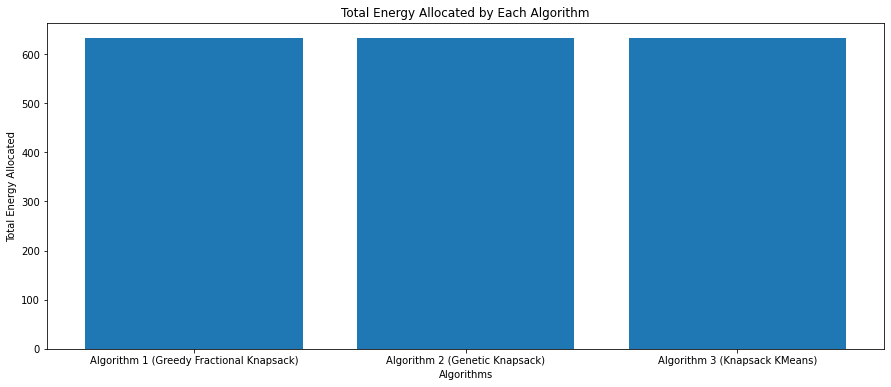

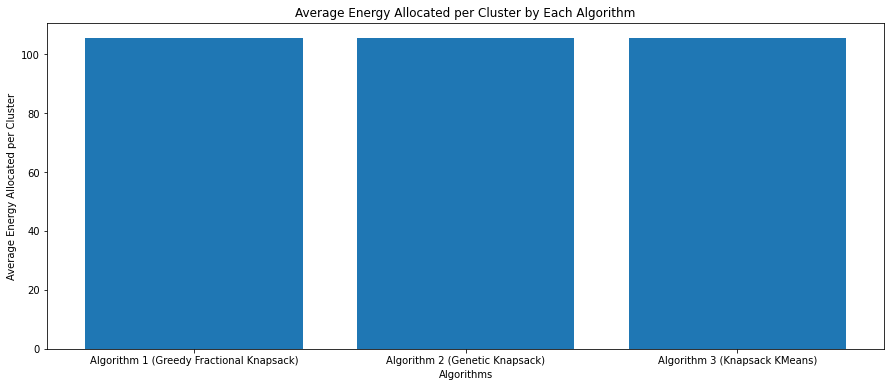

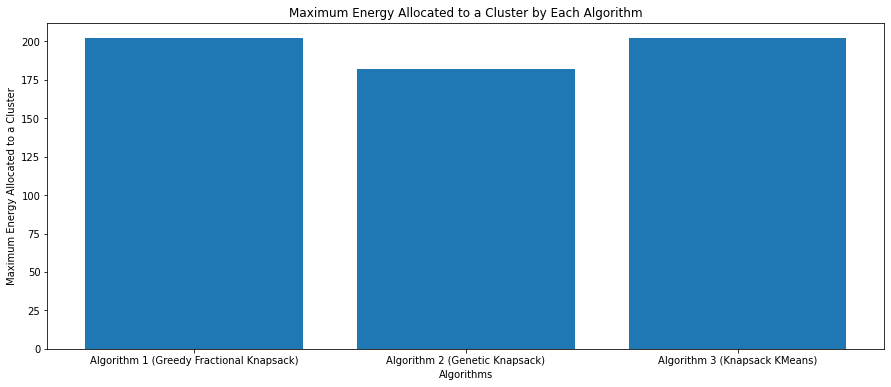

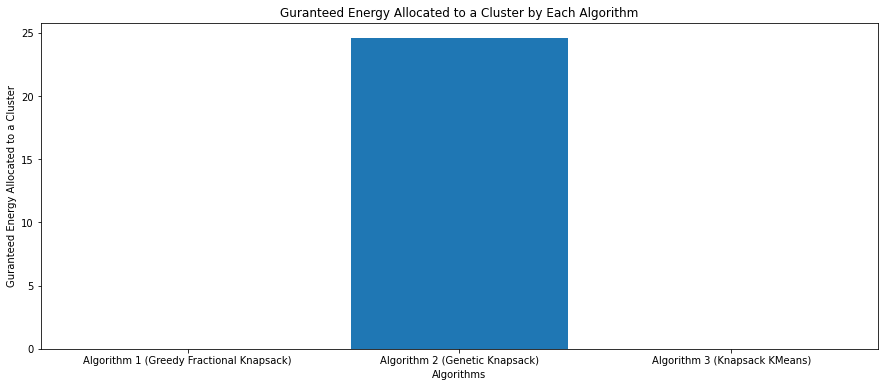

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have the outputs of Algorithm 1, Algorithm 2, and Algorithm 3
# stored in arrays or lists, where each element represents the energy allocated
# to a particular cluster.

# Example data for Algorithm 1, Algorithm 2, and Algorithm 3
algorithm1_output = np.array(allocation_knapsack)
algorithm2_output = np.array(allocation_genetic)
algorithm3_output = np.array(allocation_kmeans)

# Calculate relevant statistics for each algorithm
algorithm1_total_energy = np.sum(algorithm1_output)
algorithm2_total_energy = np.sum(algorithm2_output)
algorithm3_total_energy = np.sum(algorithm3_output)

algorithm1_avg_energy = np.mean(algorithm1_output)
algorithm2_avg_energy = np.mean(algorithm2_output)
algorithm3_avg_energy = np.mean(algorithm3_output)

algorithm1_max_energy = np.max(algorithm1_output)
algorithm2_max_energy = np.max(algorithm2_output)
algorithm3_max_energy = np.max(algorithm3_output)

algorithm1_min_energy = np.min(algorithm1_output)
algorithm2_min_energy = np.min(algorithm2_output)
algorithm3_min_energy = np.min(algorithm3_output)

# Create a bar chart to visualize the results
algorithms = ['Algorithm 1 (Greedy Fractional Knapsack)', 'Algorithm 2 (Genetic Knapsack)', 'Algorithm 3 (Knapsack KMeans)']
total_energy_allocated = [algorithm1_total_energy, algorithm2_total_energy, algorithm3_total_energy]
average_energy_allocated = [algorithm1_avg_energy, algorithm2_avg_energy, algorithm3_avg_energy]
max_energy_allocated = [algorithm1_max_energy, algorithm2_max_energy, algorithm3_max_energy]
min_energy_allocated = [algorithm1_min_energy, algorithm2_min_energy, algorithm3_min_energy]

# Plot total energy allocated
plt.figure(figsize=(15, 6))
plt.bar(algorithms, total_energy_allocated)
plt.xlabel('Algorithms')
plt.ylabel('Total Energy Allocated')
plt.title('Total Energy Allocated by Each Algorithm')
plt.show()

# Plot average energy allocated
plt.figure(figsize=(15, 6))
plt.bar(algorithms, average_energy_allocated)
plt.xlabel('Algorithms')
plt.ylabel('Average Energy Allocated per Cluster')
plt.title('Average Energy Allocated per Cluster by Each Algorithm')
plt.show()

# Plot maximum energy allocated
plt.figure(figsize=(15, 6))
plt.bar(algorithms, max_energy_allocated)
plt.xlabel('Algorithms')
plt.ylabel('Maximum Energy Allocated to a Cluster')
plt.title('Maximum Energy Allocated to a Cluster by Each Algorithm')
plt.show()

# Plot minimum energy allocated
plt.figure(figsize=(15, 6))
plt.bar(algorithms, min_energy_allocated)
plt.xlabel('Algorithms')
plt.ylabel('Guranteed Energy Allocated to a Cluster')
plt.title('Guranteed Energy Allocated to a Cluster by Each Algorithm')
plt.show()


## Cluster Satisfaction

In [24]:
import seaborn as sns

In [25]:
user_satisfaction_ratio1 = (algorithm1_total_energy / sum(energy_pred_list)) * 100
user_satisfaction_ratio2 = (algorithm2_total_energy / sum(energy_pred_list)) * 100
user_satisfaction_ratio3 = (algorithm3_total_energy / sum(energy_pred_list)) * 100

print(user_satisfaction_ratio1, user_satisfaction_ratio2, user_satisfaction_ratio3)

90.0 90.0 90.0


In [26]:
# Algorithm 1
satis1 = []
for i in range(len(energy_pred_list)):
    t = (energy_pred_list[i] - allocation_knapsack[i]) / (energy_pred_list[i])
    t = 100 - (t*100)
    satis1.append(t)
print(satis1)
print((sum(satis1)/len(satis1)))

[26.58712728026525, 100.0, 0.0, 100.0, 100.0, 100.0]
71.09785454671088


In [27]:
# Algorithm 2
satis2 = []
for i in range(len(energy_pred_list)):
    t = (energy_pred_list[i] - allocation_genetic[i]) / (energy_pred_list[i])
    t = 100 - (t*100)
    satis2.append(t)
print(satis2)
print((sum(satis2)/len(satis2)))

[90.0, 90.0, 90.0, 90.0, 90.0, 90.0]
90.0


In [28]:
# Algorithm 3
satis3 = []
for i in range(len(energy_pred_list)):
    t = (energy_pred_list[i] - allocation_kmeans[i]) / (energy_pred_list[i])
    t = 100 - (t*100)
    satis3.append(t)
print(satis3)
print((sum(satis3)/len(satis3)))

[100.0, 37.998805139038225, 0.0, 100.0, 100.0, 100.0]
72.99980085650637


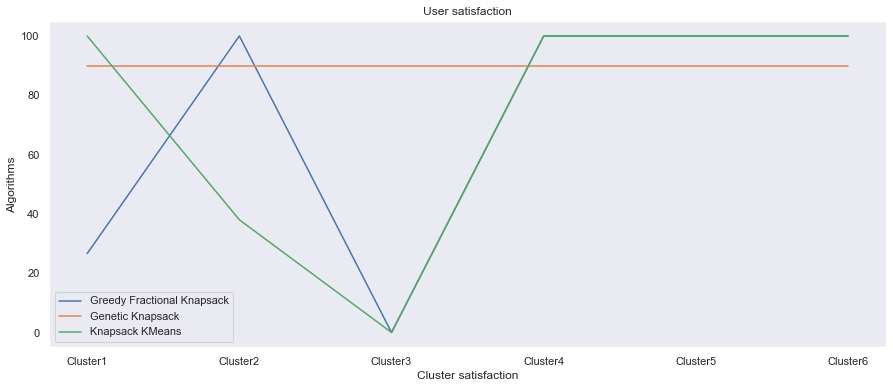

In [38]:
x = ["Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5", "Cluster6"]
y1 = satis1
y2 = satis2
y3 = satis3

plt.figure(figsize=(15, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.title("User satisfaction")
plt.legend(['Greedy Fractional Knapsack', 'Genetic Knapsack', 'Knapsack KMeans'])
plt.xlabel("Cluster satisfaction")
plt.ylabel("Algorithms")
plt.grid(False)
plt.show()


## Fairness

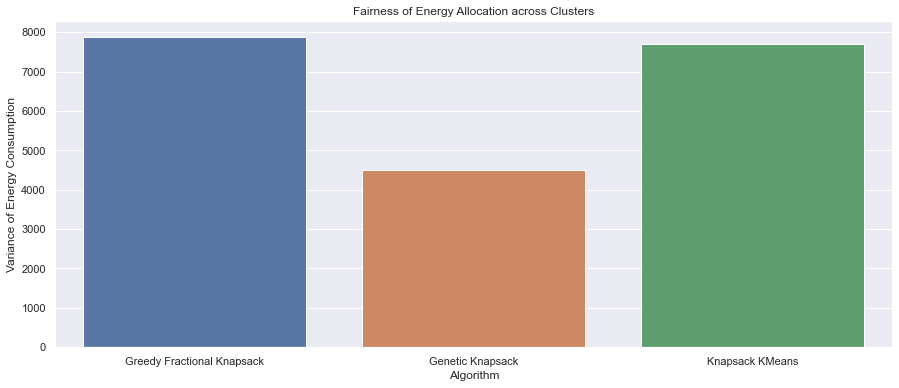

In [31]:
data = pd.DataFrame({'Greedy Fractional Knapsack': allocation_knapsack,
                     'Genetic Knapsack': allocation_genetic,
                     'Knapsack KMeans': allocation_kmeans})
variance = data.var()

# Plot the variance using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=variance.index, y=variance.values)
plt.xlabel('Algorithm')
plt.ylabel('Variance of Energy Consumption')
plt.title('Fairness of Energy Allocation across Clusters')
plt.show()

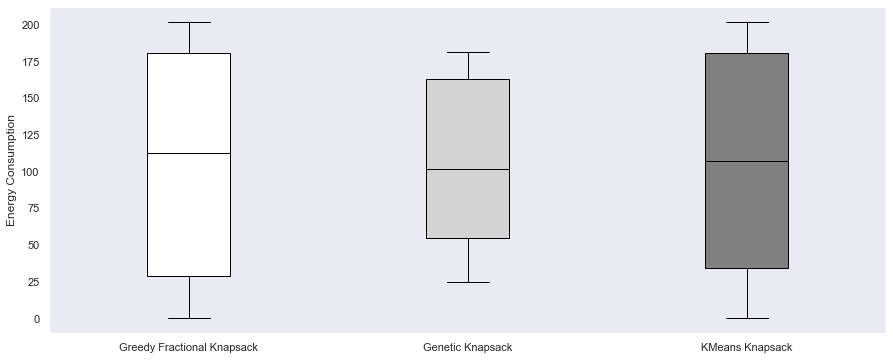

In [36]:
data = [allocation_knapsack, allocation_genetic, allocation_kmeans]
fig, ax = plt.subplots(figsize=(15, 6))
bp = ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='gray', color='black'), 
                capprops=dict(color='black'), whiskerprops=dict(color='black'), 
                flierprops=dict(markeredgecolor='black', markerfacecolor='gray'), 
                medianprops=dict(color='black'))
colors = ['white', 'lightgray', 'gray']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(['Greedy Fractional Knapsack', 'Genetic Knapsack', 'KMeans Knapsack'])
ax.set_ylabel('Energy Consumption')
ax.grid(False)
plt.show()


In our case, the variance represents how spread out the allocated energy is across all the clusters for each algorithm. A smaller variance indicates that the allocated energy is more evenly distributed among the clusters, while a larger variance indicates that the allocated energy is more unevenly distributed, with some clusters receiving much more energy than others.

To put it simply, a low variance means that the energy allocation is more fair across all the clusters, while a high variance means that the energy allocation is less fair.

Therefore, by calculating the variance of allocated energy for each algorithm, we can compare the fairness of energy allocation across the different algorithms.

## Energy wastage ratio

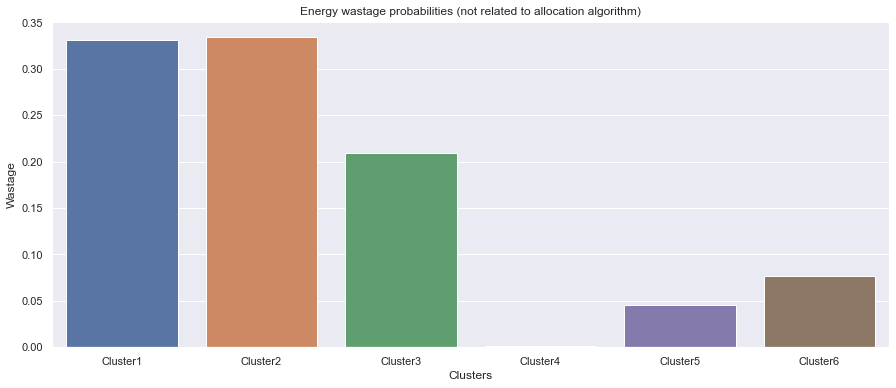

In [32]:
plt.figure(figsize=(15, 6))
sns.barplot(x=["Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5", "Cluster6"], y=wastage_prob_list)
plt.xlabel('Clusters')
plt.ylabel('Wastage')
plt.title('Energy wastage probabilities (not related to allocation algorithm)')
plt.show()

Other metrics-

1. **Overall energy utilization:** Calculate the total energy produced by the system and compare it to the total energy consumed by all clusters. A higher utilization rate indicates better performance.

2. **Cluster energy utilization:** Calculate the ratio of energy consumed by each cluster to the energy allocated to it. A higher ratio indicates better performance, as it means the cluster is using more of the energy it was allocated.

3. **Energy wastage:** Calculate the difference between the energy produced and the energy consumed by all clusters. A lower wastage rate indicates better performance, as it means less energy is being wasted.

4. **Fairness:** Calculate the variance of the energy consumption across all clusters. A lower variance indicates better performance, as it means the energy allocation is more evenly distributed among clusters.

5. **Accuracy:** Calculate the accuracy of the energy forecasting models for each cluster. A higher accuracy rate indicates better performance, as it means the forecasts are more accurate and can be used to make better energy allocation decisions.